In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from os import path
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv, find_dotenv
%matplotlib notebook

sns.set(color_codes=True)

RAW_DATA_DIR = os.environ.get("RAW_DATA_DIR")
RAW_DATA_DIR='D:\\Documents\\Notebooks\\CapstoneProject\\data\\raw'


In [2]:
data = pd.read_csv(path.join(RAW_DATA_DIR, 'gender_age_train.csv'))
data = data.sort_values(by='age')
labels = data['group']


In [3]:
f = {}
for l in labels:
    if l in f:
        f[l] += 1
    else:
        f[l] = 1

sex = {}
for g in data['gender']:
    if g in sex:
        sex[g] += 1
    else:
        sex[g] = 1

for s in sex:
    sex[s] = float(sex[s])/len(labels)
for e in f:
    f[e] = float(f[e])/len(labels)

In [4]:
print data['gender'].value_counts()
print 'Sexes frequency: {:.3f} males, {:.3} females'.format(sex['M'], sex['F'])

M    47904
F    26741
Name: gender, dtype: int64
Sexes frequency: 0.642 males, 0.358 females


<IPython.core.display.Javascript object>


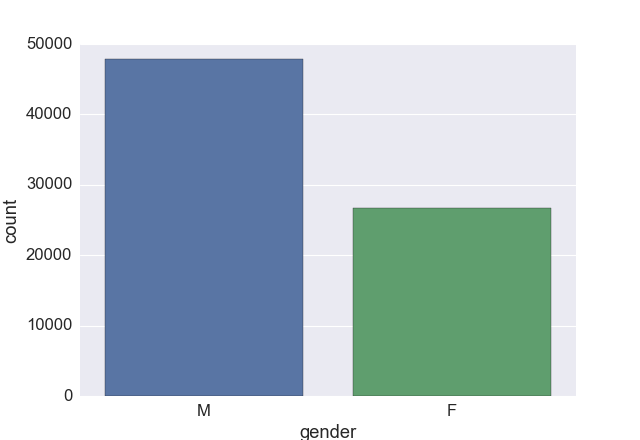

In [6]:
sns.set(font_scale=1.5)

ax = sns.countplot(x='gender', data=data)
#ax.set_title('Males and Females instances')

<IPython.core.display.Javascript object>


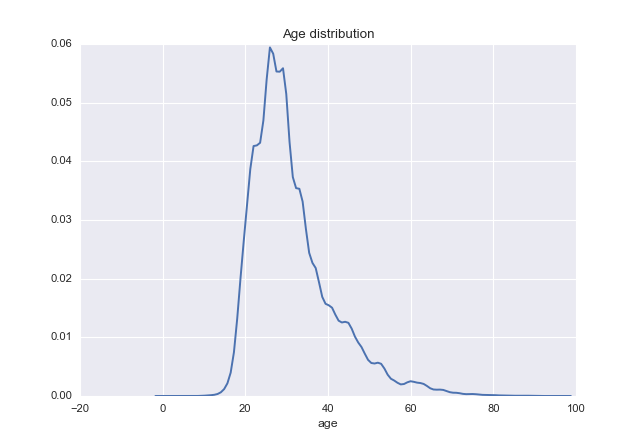

In [34]:
plt.figure()
age = sns.distplot(data['age'], hist=False)
age.set_title('Age distribution')

<IPython.core.display.Javascript object>


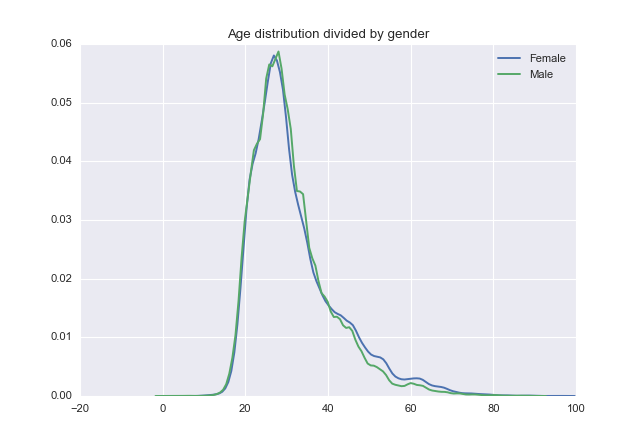

In [38]:
plt.figure()
sns.kdeplot( data['age'][ data['gender'] == 'F' ], label='Female')
sns.kdeplot( data['age'][ data['gender'] == 'M' ], label='Male').set_title(
                                        'Age distribution divided by gender')


<IPython.core.display.Javascript object>


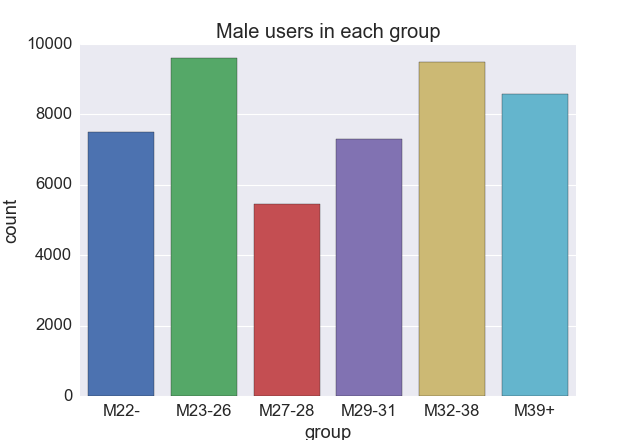

In [7]:
plt.figure()
ax = sns.countplot(x='group', data=data[data.gender == 'M'], saturation=1)
ax.set_title('Male users in each group')

<IPython.core.display.Javascript object>


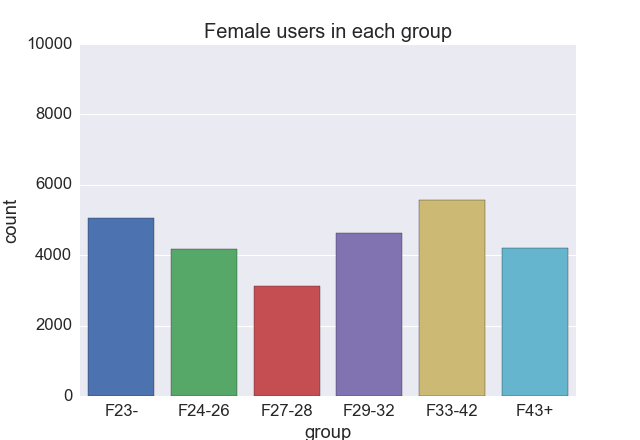

In [8]:
plt.figure()
ax = sns.countplot(x='group', data=data[data.gender == 'F'], saturation=1)
ax.axes.set_ylim(0,10000)
ax.set_title('Female users in each group')

These plots shows that the classes are unbalanced. Young people are largely
more numerous than old, also there is a higher representation of males over
females. Among the older, there are more data coming from males rather than
females. This result is consistent with Chinese demographic and the fact that
the use of technology is more diffused among younger generations. Therefore
these data don't have to be resempled in order to create a uniform distribution
of the classes. COMMENT ON DIFFERENT BIN WIDTH AGE-WISE
